# Excel laden

We beginnen met het inlezen van onze excel dataset.

# Data importeren

In [31]:
#### uitleg waarom pandas library (is super logisch maar moet je wel ff melden, pandas is namelijk bedoeld voor het makkelijk openen en visualiseren van excel / csv bestanden)

import pandas as pd

df_2019 = pd.read_excel("DATA_2019.xlsx", 
                   usecols=["titel", "datum", "sterren","review"], # Selecteer kolommen die je wil laden.
                   skiprows=[1])  

df_2020 = pd.read_excel("DATA_2020.xlsx", 
                   usecols=["titel", "datum", "sterren","review"], # Selecteer kolommen die je wil laden.
                   skiprows=[1]) 

# Sla de rij met alleen "November" over.

In [32]:
## Maak dictionaries ...... uitleg .... best ingewikkeld namelijk dicitonaries dus zou wel ff aangeven waarom je dit gebruikt 
##(andersom redeneren vanuit theorie) Het komt in iedergeval neer op dat dictionaries chill zijn voor key - value shit en dat je onder 1 key meerdere values kan hebben 

records_2019 = df_2019.to_dict('records')

records_2020 = df_2020.to_dict('records')


print(records_2019[0])


{'titel': 'Geld terug door een fout van bol.com en Dynalogic', 'datum': Timestamp('2019-03-01 00:00:00'), 'sterren': 2.0, 'review': 'Ik heb een wasmachine besteld, eerst is alles in goede orde ontvangen op het depot , en dan net voor vertrek van de chauffeur is hij in eens beschadigd. Krijg daar netjes een email over, dat de levering niet doorgaat. Krijg geen andere wasmachine, maar mijn geld terug. Moet daar drie werkdagen op wachten. En kan daarna de zelfde wasmachine weer bestellen.\nWaarom nou zo omslachtig.\nAls er al betaald is voor de wasmachine. Er zijn nog genoeg van de zelfde op voorraad staat op de site.\nDus de klant is nu de dupe voor een fout van bol.com en Dynalogic.'}


In [33]:
## test print 2020

print(records_2020[0])


{'titel': 'Bol.com in combinatie met Select is…', 'datum': '16-11-2020', 'sterren': 5.0, 'review': 'Bol.com in combinatie met Select is echt super. Altijd snelle levering en gratis verzending. Soms zelfs dezelfde dag nog.'}


# Keywords tellen in gehele databestand = intiële analyse (niet per review, dus dit is niet de analyse die we uiteindelijk gebruikt hebben voor het beantwoorden van de deelvraag)

In [35]:
# Zet het aantal keer bezorgd in 'count-bezorg' in dictionary
# We gebruiken de stam van bezorging/bezorgen, etc = 'bezorg'
for record in records_2019:
    review_text = str(record['review'])
    record['count-bezorg'] = review_text.lower().count('bezorg')
    record['count-product'] = review_text.lower().count('product')
    record['count-service'] = review_text.lower().count('service')
    record['count-levering'] = review_text.lower().count('levering')
    record['lengte-review'] = len(review_text)

In [36]:
## zelfde voor 2020
for record in records_2020:
    review_text = str(record['review'])
    record['count-bezorg'] = review_text.lower().count('bezorg')
    record['count-product'] = review_text.lower().count('product')
    record['count-service'] = review_text.lower().count('service')
    record['count-levering'] = review_text.lower().count('levering')
    record['lengte-review'] = len(review_text)

In [37]:
# Tellen voor het jaar 2019
totaal_bezorg = 0
totaal_product = 0
totaal_service = 0
totaal_levering = 0
for record in records_2019:
    
    totaal_bezorg += record['count-bezorg']
    totaal_product += record['count-product']
    totaal_service += record['count-service']
    totaal_levering += record['count-levering']
print('Totaal met het woord bezorg in 2019 is ' + str(totaal_bezorg))
print('Totaal met het woord product in 2019 is ' + str(totaal_product))
print('Totaal met het woord service in 2019 is ' + str(totaal_service))
print('Totaal met het woord levering in 2019 is ' + str(totaal_levering))

Totaal met het woord bezorg in 2019 is 196
Totaal met het woord product in 2019 is 199
Totaal met het woord service in 2019 is 449
Totaal met het woord levering in 2019 is 220


In [38]:
# Tellen voor het jaar 2020
totaal_bezorg = 0
totaal_product = 0
totaal_service = 0
totaal_levering = 0
for record in records_2020:
    
    totaal_bezorg += record['count-bezorg']
    totaal_product += record['count-product']
    totaal_service += record['count-service']
    totaal_levering += record['count-levering']
print('Totaal met het woord bezorg in 2020 is ' + str(totaal_bezorg))
print('Totaal met het woord product in 2020 is ' + str(totaal_product))
print('Totaal met het woord service in 2020 is ' + str(totaal_service))
print('Totaal met het woord levering in 2020 is ' + str(totaal_levering))

Totaal met het woord bezorg in 2020 is 158
Totaal met het woord product in 2020 is 220
Totaal met het woord service in 2020 is 450
Totaal met het woord levering in 2020 is 173


# H4 gaat over de gemiddelde lengte van de reviews. Hieronder berekenen we die.

In [48]:
total_len_2019 = 0 
for record in records_2019:
    total_len_2019 += record['lengte-review']
mean_len_2019 = total_len_2019/len(records_2019)
print('Gemiddelde lengte van reviews in 2019 is ' + str(mean_len_2019))

Gemiddelde lengte van reviews in 2019 is 283.45706618962436


In [10]:
# H4 gaat over de gemiddelde lengte van de reviews. Hieronder berekenen we die.
total_len_2020 = 0 
for record in records_2020:
    total_len_2020 += record['lengte-review']
mean_len_2020 = total_len_2020/len(records_2020)
print('Gemiddelde lengte van reviews in 2020 is ' + str(mean_len_2020))

Gemiddelde lengte van reviews in 2020 is 306.9081934846989


# Sterren tellen + verdeling berekenen

In [11]:
df_2019.describe()

,sterren
count,1109.000000
mean,3.202885
std,1.823768
min,1.000000
25%,1.000000
50%,4.000000
75%,5.000000
max,5.000000


In [12]:
df_2020.describe()

,sterren
count,1002.000000
mean,2.868263
std,1.856116
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5.000000


In [14]:
## Eerst kijken hoe de verdeling is met de functie value_counts()
df_2019['sterren'].value_counts()

5.0    484
1.0    401
4.0    125
2.0     66
3.0     33
Name: sterren, dtype: int64

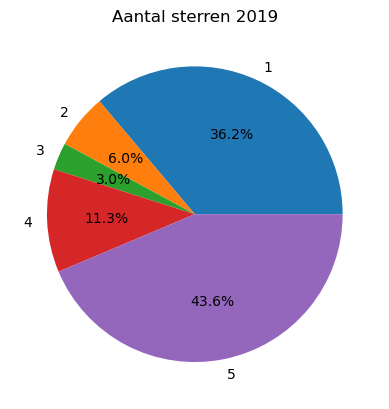

<Figure size 640x480 with 0 Axes>

In [40]:
##hierboven valt nu te lezen hoe de sterrenverdeling is, die zetten we in een [list] en maken van deze twee lijsten (labels en waarden) een piechart.

import numpy as np
import matplotlib.pyplot as plt

sterrendata_2019 = [401,66,33,125,484]
sterrenlabels = [1,2,3,4,5]
plt.pie(sterrendata_2019,labels=sterrenlabels,autopct='%1.1f%%')
plt.title('Aantal sterren 2019')
plt.show()
plt.savefig('Aantal sterren 2019')

In [41]:
##zelfde voor 2020, eerst kijken naar de verdeling 
df_2020['sterren'].value_counts()


1.0    447
5.0    384
2.0     74
4.0     68
3.0     29
Name: sterren, dtype: int64

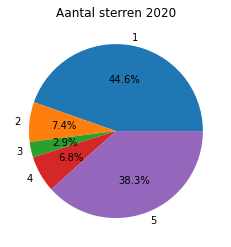

<Figure size 432x288 with 0 Axes>

In [73]:


sterrendata_2020 = [447,74,29,68,384]
plt.pie(sterrendata_2020,labels=sterrenlabels,autopct='%1.1f%%')
plt.title('Aantal sterren 2020')
plt.show()
plt.close()
plt.savefig('Aantal sterren 2020')

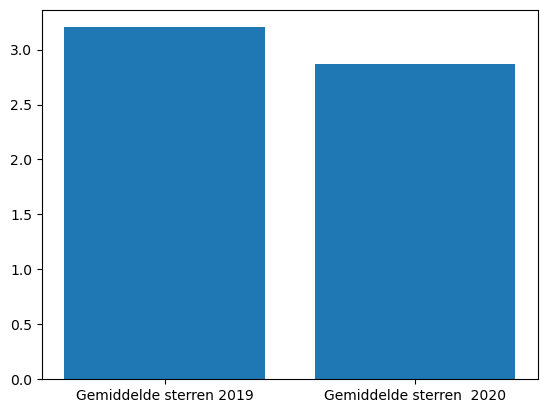

<Figure size 640x480 with 0 Axes>

In [42]:
import numpy as np
import matplotlib.pyplot as plt

gemiddelde_sterren_2019 = df_2019['sterren'].mean()
gemiddelde_sterren_2020 = df_2020['sterren'].mean()

bars = ['Gemiddelde sterren 2019', 'Gemiddelde sterren  2020']
plt.bar(bars, [gemiddelde_sterren_2019, gemiddelde_sterren_2020])
plt.xticks()
plt.show()
plt.savefig('barchartsgemiddelden')

# Tellen van het aatal reviews dat een bepaald keyword bevat - 2019

In [18]:
### Aantal cellen in de kolom review zijn leeg. Normaal gesproken bij data shit zorg je eerst dat je dit soort lege cellen fixt (meestal verwijderen). Echter, in jullie data is het zo dat een lege review kolom vaak wel sterren heeft, dus als je die gaat verwijderen verlies je waardevolle info. Hierom hebben jullie bedacht een for loop te maken met try en except, om zo wanneer de for loop iterate door een lega cel (waar hij normaal gesproken foutmelding geeft) hij weet dat hij hier 'continue' moet doen

count_bezorg = 0
for i in df_2019['review']:
    try:
        
        if 'bezorg' in i:
            count_bezorg += 1
    except:
        
        continue
        
print('Het aantal reviews met bezorg erin in 2019 is ' + str(count_bezorg))


Het aantal reviews met bezorg erin in 2019 is 143


In [32]:
count_product = 0
for i in df_2019['review']:
    try:
        
        if 'product' in i:
            count_product += 1
    except:
        
        continue
        
print('Het aantal reviews met product erin in 2019 is ' + str(count_product))

Het aantal reviews met product erin in 2019 is 134


In [33]:
count_service = 0
for i in df_2019['review']:
    try:
        
        if 'service' in i:
            count_service += 1
    except:
        
        continue
        
print('Het aantal reviews met service erin in 2019 is ' + str(count_service))

Het aantal reviews met service erin in 2019 is 352


In [17]:
count_levering = 0
for i in df_2019['review']:
    try:
        
        if 'levering' in i:
            count_levering += 1
    except:
        
        continue
        
print('Het aantal reviews met levering erin in 2019 is ' + str(count_levering))

Het aantal reviews met levering erin in 2019 is 182


In [38]:
count_slecht = 0
for i in df_2019['review']:
    try:
        
        if 'slecht' in i:
            count_slecht += 1
    except:
        
        continue
        
print('Het aantal reviews met slecht erin in 2019 is ' + str(count_slecht))

Het aantal reviews met slecht erin in 2019 is 99


In [64]:
count_goed = 0
for i in df_2019['review']:
    try:
        
        if 'goed' in i:
            count_goed += 1
    except:
        
        continue
        
print('Het aantal reviews met goed erin in 2019 is ' + str(count_goed))

Het aantal reviews met goed erin in 2019 is 287


In [40]:
count_nep = 0
for i in df_2019['review']:
    try:
        
        if 'nep' in i:
            count_nep += 1
    except:
        
        continue
        
print('Het aantal reviews met nep erin in 2019 is ' + str(count_nep))

Het aantal reviews met nep erin in 2019 is 2


In [41]:
count_misleid = 0
for i in df_2019['review']:
    try:
        
        if 'misleid' in i:
            count_misleid += 1
    except:
        
        continue
        
print('Het aantal reviews met misleid erin in 2019 is ' + str(count_misleid))

Het aantal reviews met misleid erin in 2019 is 7


# Tellen van het aantal reviews dat een bepaald keyword bevat - 2020

In [22]:
count_bezorg = 0
for i in df_2020['review']:
    try:
        
        if 'bezorg' in i:
            count_bezorg += 1
    except:
        
        continue
        
print('Het aantal reviews met bezorg erin in 2020 is ' + str(count_bezorg))

Het aantal reviews met bezorg erin in 2020 is 111


In [23]:
count_product = 0
for i in df_2020['review']:
    try:
        
        if 'product' in i:
            count_product += 1
    except:
        
        continue
        
print('Het aantal reviews met product erin in 2020 is ' + str(count_product))

Het aantal reviews met product erin in 2020 is 140


In [24]:
count_service = 0
for i in df_2020['review']:
    try:
        
        if 'service' in i:
            count_service += 1
    except:
        
        continue
        
print('Het aantal reviews met service erin in 2020 is ' + str(count_service))

Het aantal reviews met service erin in 2020 is 340


In [25]:
count_levering = 0
for i in df_2020['review']:
    try:
        
        if 'levering' in i:
            count_levering += 1
    except:
        
        continue
        
print('Het aantal reviews met levering erin in 2020 is ' + str(count_levering))

Het aantal reviews met levering erin in 2020 is 142


In [42]:
count_slecht = 0
for i in df_2020['review']:
    try:
        
        if 'slecht' in i:
            count_slecht += 1
    except:
        
        continue
        
print('Het aantal reviews met slecht erin in 2020 is ' + str(count_slecht))

Het aantal reviews met slecht erin in 2020 is 107


In [63]:
count_goed = 0
for i in df_2020['review']:
    try:
        
        if 'goed' in i:
            count_goed += 1
    except:
        
        continue
        
print('Het aantal reviews met goed erin in 2020 is ' + str(count_goed))

Het aantal reviews met goed erin in 2020 is 260


In [44]:
count_nep = 0
for i in df_2020['review']:
    try:
        
        if 'nep' in i:
            count_nep += 1
    except:
        
        continue
        
print('Het aantal reviews met nep erin in 2020 is ' + str(count_nep))

Het aantal reviews met nep erin in 2020 is 2


In [21]:
count_misleid = 0
for i in df_2020['review']:
    try:
        
        if 'misleid' in i:
            count_misleid += 1
    except:
        
        continue
        
print('Het aantal reviews met misleid erin in 2020 is ' + str(count_misleid))

Het aantal reviews met misleid erin in 2020 is 6


# Barchart verdelingen 

In [22]:
labels_2019 = ['reviews met bezorg', 'reviews met product', 'reviews met service', 'reviews met levering']
aantallen_2019 = [143, 134, 352, 182]

In [27]:
labels_2020 = ['reviews met bezorg', 'reviews met product', 'reviews met service', 'reviews met levering']
aantallen_2020 = [111, 140, 340, 142]

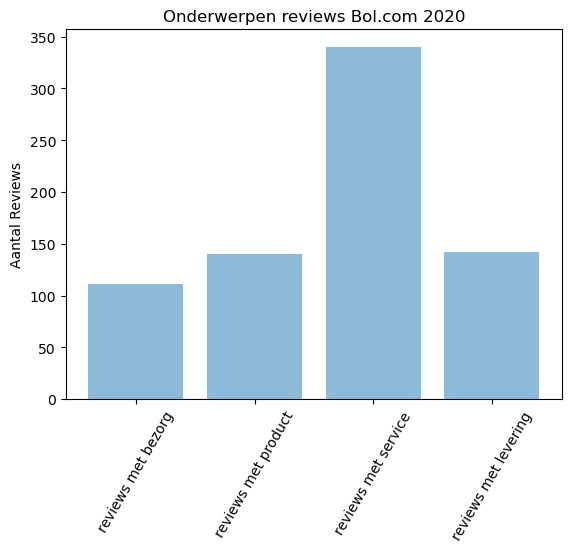

<Figure size 640x480 with 0 Axes>

In [46]:
#Bar chart voor 2020 maken
# Importeren van libraries matplotlib and numpy
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Bar chart opmaken 
y_pos = np.arange(len(labels_2020))
plt.bar(y_pos, aantallen_2020, align='center', alpha=0.5)

plt.xticks(y_pos, labels_2020, rotation=60)
plt.ylabel('Aantal Reviews')
plt.title('Onderwerpen reviews Bol.com 2020')
plt.show()
plt.savefig('img2.jpg', dpi=500)

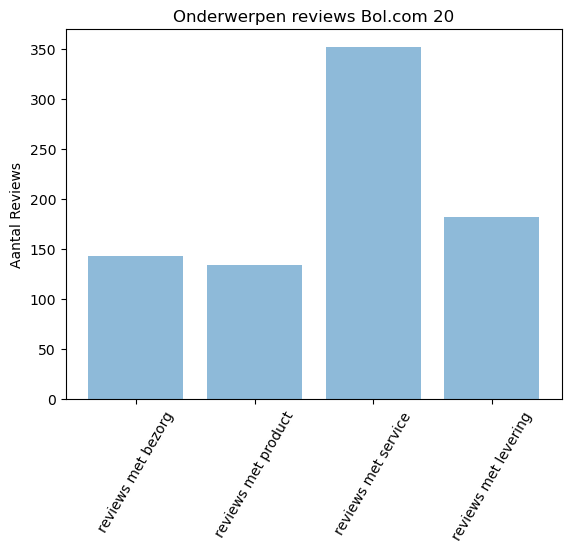

<Figure size 640x480 with 0 Axes>

In [47]:
#Bar chart 2019 maken
# Importeren van libraries matplotlib and numpy
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(labels_2019))
plt.bar(y_pos, aantallen_2019, align='center', alpha=0.5)

plt.xticks(y_pos, labels_2019, rotation=60)
plt.ylabel('Aantal Reviews')
plt.title('Onderwerpen reviews Bol.com 20')
plt.show()
plt.savefig('img2.jpg', dpi=500)